In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn
plt.style.use('ggplot')

ga_2, gr_2 = pd.read_csv('Data/galist_2.csv'), pd.read_csv('Data/grlist_2.csv')
ga_s, gr_s = pd.read_csv('Data/galist_s.csv'), pd.read_csv('Data/grlist_s.csv')

# объединение по iGrID
all_g_2, all_g_s = pd.merge(ga_2, gr_2, on='iGrID'), pd.merge(ga_s, gr_s, on='iGrID')

# фильтрация по Ntot
g_2, g_s = all_g_2[all_g_2.Ntot > 30], all_g_s[all_g_s.Ntot > 30]

# фильтрация по наличию красного смещения и массы бессмыслена, так как в данных признаках нет пропусков
# можно в целом избавиться от пропусков по другим признакам

f_g_2, f_g_s = g_2.dropna(), g_s.dropna()

In [2]:
print('размеры коллекций данных:')
print('\tбез фильтрации -', all_g_2.shape, all_g_s.shape)
print('\tфильтрация по количеству галактик -', g_2.shape, g_s.shape)
print('\t+ фильтрация по пропускам -', f_g_2.shape, f_g_s.shape)

размеры коллекций данных:
	без фильтрации - (43425, 21) (402439, 23)
	фильтрация по количеству галактик - (1200, 21) (30539, 23)
	+ фильтрация по пропускам - (425, 21) (28478, 23)


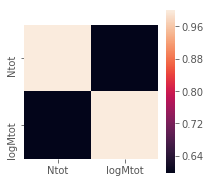

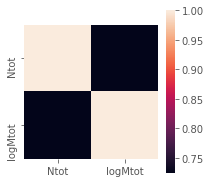

In [3]:
# корреляции между массой скопления и количеством галакитик в скоплении (2MRS и SDSS) особо нет
plt.figure(figsize=(3,3))
_ = seaborn.heatmap(g_2[['Ntot', 'logMtot']].corr(), square=True)
plt.show()

plt.figure(figsize=(3,3))
_ = seaborn.heatmap(g_s[['Ntot', 'logMtot']].corr(), square=True)
plt.show()

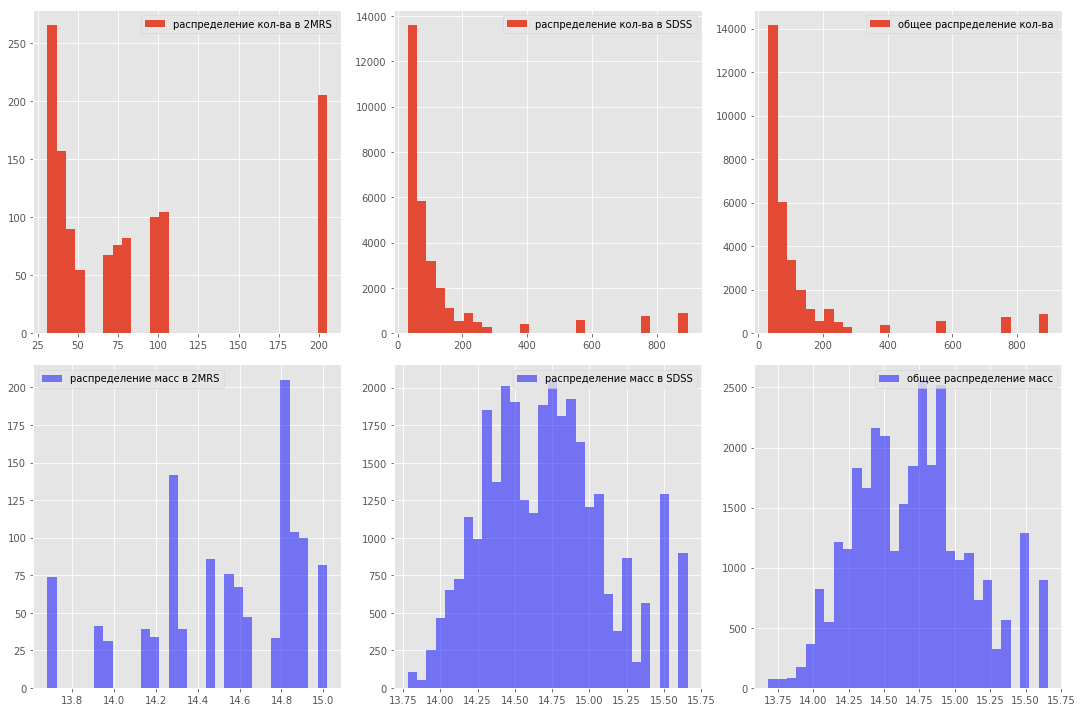

In [4]:
# теперь можно посмотреть на распредления масс скоплений и количества галактик в них

fig, axs = plt.subplots(2, 3, figsize=(15,10))

axs[0, 0].hist(g_2.Ntot, bins=30, label='распределение кол-ва в 2MRS')
axs[0, 0].legend(loc='best')
axs[0, 1].hist(g_s.Ntot, bins=30, label='распределение кол-ва в SDSS')
axs[0, 1].legend(loc='best')
axs[0, 2].hist(np.concatenate((g_2.Ntot, g_s.Ntot)), bins=30, label='общее распределение кол-ва')
axs[0, 2].legend(loc='best')
axs[1, 0].hist(g_2.logMtot, alpha=0.5, color='b', bins=30, label='распределение масс в 2MRS')
axs[1, 0].legend(loc='best')
axs[1, 1].hist(g_s.logMtot, alpha=0.5, color='b', bins=30, label='распределение масс в SDSS')
axs[1, 1].legend(loc='best')
axs[1, 2].hist(np.concatenate((g_2.logMtot, g_s.logMtot)), alpha=0.5, color='b', bins=30, label='общее распределение масс')
axs[1, 2].legend(loc='best')
plt.tight_layout()

на что похоже:
    1. распределение масс схоже с нормальным распредлением
    2. распределение количества голактик похоже на показательное распределение

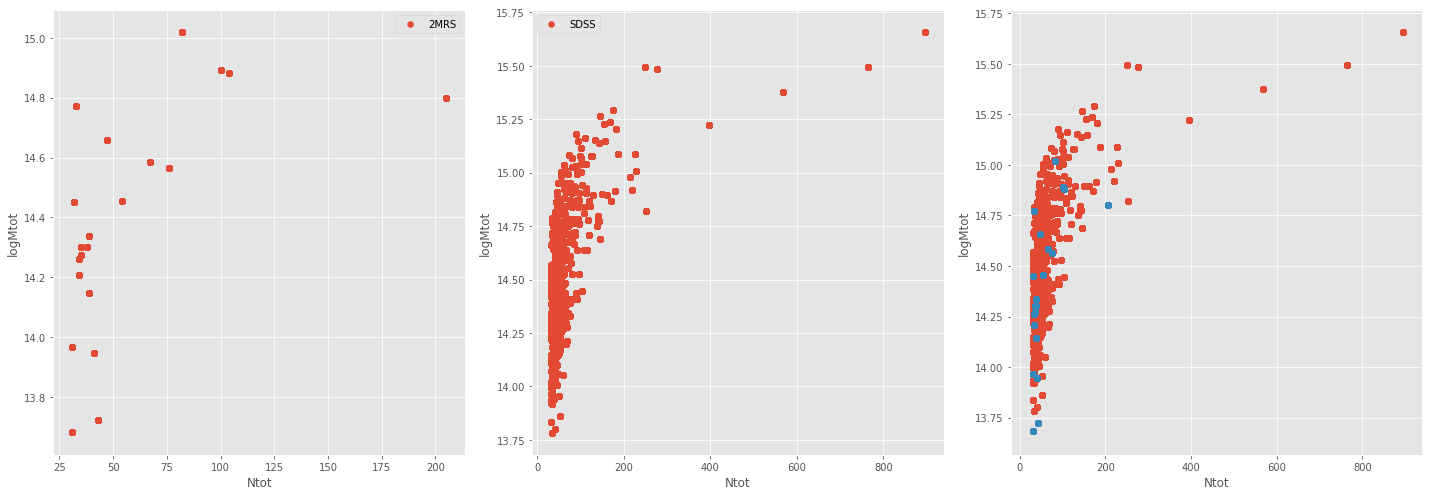

In [5]:
#зависимость между количеством и массой

fig, axs = plt.subplots(1, 3, figsize=(20,7))

axs[0].scatter(g_2.Ntot, g_2.logMtot, label='2MRS')
axs[0].legend(loc='best')
axs[0].set_xlabel('Ntot')
axs[0].set_ylabel('logMtot')
axs[1].scatter(g_s.Ntot, g_s.logMtot, label='SDSS')
axs[1].legend(loc='best')
axs[1].set_xlabel('Ntot')
axs[1].set_ylabel('logMtot')
axs[2].scatter(g_s.Ntot, g_s.logMtot)
axs[2].scatter(g_2.Ntot, g_2.logMtot)
axs[2].set_xlabel('Ntot')
axs[2].set_ylabel('logMtot')

plt.tight_layout()